In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('nigeria_houses_data.csv')

In [4]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [5]:
df.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


## Data Visulization

<AxesSubplot:xlabel='state'>

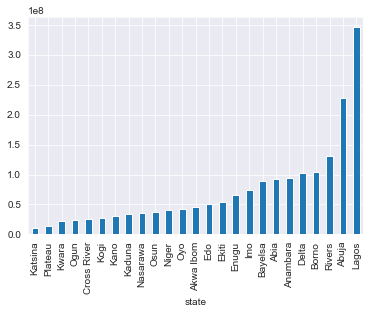

In [20]:
df.groupby('state')['price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='town'>

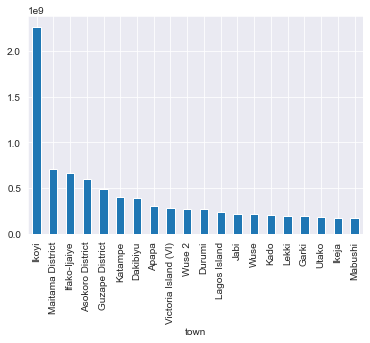

In [22]:
df.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [25]:

df = pd.get_dummies(df, columns=['title', 'state', 'town'])


In [26]:
df

,bedrooms,bathrooms,toilets,parking_space,price,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,...,town_Uyo,town_Victoria Island (VI),town_Warri,town_Wumba,town_Wuse,town_Wuse 2,town_Wuye,town_Yaba,town_Yenagoa,town_Yewa South
0,6.0,5.0,5.0,4.0,450000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,800000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,120000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,40000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,75000000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,15000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24322,4.0,5.0,5.0,4.0,25000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24323,4.0,5.0,5.0,4.0,68000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24324,3.0,4.0,4.0,3.0,78000000.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
X = df.drop(['price'],axis=1)

In [30]:
y = df.price

In [33]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Fit the scaler on your data and transform it
X= scaler.fit_transform(X)


In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature matrix and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 'X_train' and 'y_train' are your training data and labels
# 'X_test' and 'y_test' are your testing data and labels


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
RFR = RandomForestRegressor()

In [38]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred=RFR.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'y_true' contains the true target values and 'y_pred' contains the predicted values
# These can be obtained after training a linear regression model

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 5026333729250.268
Mean Absolute Error: 101730.46776923128
R-squared (R2) Score: 0.9999387811296426
